In [ ]:
#requirements on colab
!pip install umap-learn scprep

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import umap

import time

def run_pca(data,n_components=30,random_state =1):
    today= time.ctime()
  
    
    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data= pca.fit_transform(data)
    print('process start',today)
    return pca_data


def run_umap(pca_data, n_neighbors=15, n_components=2, metric='euclidean', metric_kwds=None,
             output_metric='euclidean', output_metric_kwds=None, n_epochs=None, learning_rate=1.0, 
             init='spectral', min_dist=0.1, spread=1.0, low_memory=True, n_jobs=-1, set_op_mix_ratio=1.0, 
             local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0,
             a=None, b=None, random_state=None, angular_rp_forest=False, target_n_neighbors=-1,
             target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42,
             transform_mode='embedding', force_approximation_algorithm=False, verbose=False, 
             unique=False, densmap=False, dens_lambda=2.0, dens_frac=0.3, dens_var_shift=0.1, 
             output_dens=False, disconnection_distance=None):
    
    fit = umap.UMAP(n_neighbors, n_components, metric, metric_kwds,
             output_metric, output_metric_kwds, n_epochs, learning_rate, 
             init, min_dist, spread, low_memory, n_jobs, set_op_mix_ratio, 
             local_connectivity, repulsion_strength, negative_sample_rate, transform_queue_size,
             a, b, random_state, angular_rp_forest, target_n_neighbors,
             target_metric, target_metric_kwds, target_weight, transform_seed,
             transform_mode, force_approximation_algorithm, verbose, 
             unique, densmap, dens_lambda, dens_frac, dens_var_shift, 
             output_dens, disconnection_distance)
    dim_reduction = fit.fit_transform(pca_data)
    
    return dim_reduction


def sc_PHENIX(data, umap_data,t=10,decay=15,metric='euclidean',knn=10):



    print('calculando distancias')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))
    
    print('imputation')
    
    Matix_col_genes_row_cell2 = (data +1) - data
    
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    
    sc_PHENIX = Matix_impu 
    
    print('done')
    end= time.ctime()
    print('done',end)


    return (sc_PHENIX)


def sc_PHENIX_R(data, umap_data, t=10,decay=15,metric='cosine',knn=10):
    


    print('calculando distancias eucle')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))



    rescale_percent =99.99
    M99 = np.percentile(data, rescale_percent, axis=0)
    M100 = data.max(axis=0)
    indices = np.where(M99 == 0)[0]
    M99[indices] = M100[indices]



    M99_new = np.percentile(data_new, rescale_percent, axis=0)
    M100_new = data_new.max(axis=0)
    indices = np.where(M99_new == 0)[0]
    M99_new[indices] = M100_new[indices]


    max_ratio = np.divide(M99, M99_new)
    data_new = np.multiply(data_new, np.tile(max_ratio, (len(data), 1)))



    print('reescalate')

    
    print('imputation')
    
    Matix_col_genes_row_cell2 = (data +1) - data
    
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    
    Matix_impu = Matix_impu 
    
    print('done')
    end= time.ctime()
    print('done',end)


    return (Matix_impu)



In [ ]:

import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
sample_data = pd.read_csv('/content/mod_tabla_sample.txt', delimiter = "\t")
sample_data = sample_data.set_index('sample_id')
sample_data = sample_data['status']
sample_data = pd.DataFrame(sample_data)
sample_data

,status
sample_id,
sample_30099,healthy
sample_30104,healthy
sample_30114,IFG
sample_30170,IFG+IGT
sample_30189,T2D
...,...
sample_75015,IGT
sample_75024,IFG+IGT
sample_75029,healthy


In [ ]:
status= np.array(sample_data['status'])
status

array(['healthy', 'healthy', 'IFG', 'IFG+IGT', 'T2D', 'T2D', 'IFG', 'IGT',
       'IGT', 'T2D', 'IFG', 'healthy', 'T2D', 'IGT', 'healthy', 'IGT',
       'T2D_treated', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'IFG+IGT', 'IFG+IGT', 'IFG+IGT', 'IFG+IGT',
       'healthy', 'IFG', 'IFG', 'IFG+IGT', 'T2D', 'IFG+IGT', 'IFG',
       'healthy', 'healthy', 'IFG', 'healthy', 'IFG+IGT', 'IFG+IGT',
       'IGT', 'IGT', 'healthy', 'T2D', 'IFG', 'T2D', 'healthy', 'healthy',
       'healthy', 'IGT', 'T2D_treated', 'IFG+IGT', 'IFG', 'IFG+IGT',
       'healthy', 'healthy', 'healthy', 'healthy', 'T2D', 'healthy',
       'healthy', 'IGT', 'healthy', 'IGT', 'IGT', 'healthy', 'IGT', 'IFG',
       'healthy', 'IFG+IGT', 'IGT', 'IFG+IGT', 'IFG+IGT', 'T2D', 'IFG',
       'IFG', 'T2D', 'T2D', 'healthy', 'healthy', 'T2D', 'healthy',
       'T2D_treated', 'healthy', 'healthy', 'IGT', 'healthy', 'healthy',
    

In [ ]:
matrix = pd.read_csv('/content/abund_asv.txt', delimiter = "\t",header=0)#.set_index('Unnamed: 0').T
matrix= matrix.set_index('sample_id')
matrix

,5fdbcbf910859787c61abdd2787462be,7a8d774ebc149e3a4db3f186814a9964,7744ee0171a4b767f8815c6455103d7e,4c13e11c59ed3c940d380a0f33188cc9,d10716680579ff0bcf3e5dc53a1cb619,8994967a8e7c878ad16a3bb998fa8ce5,9eae628af1e873c246e6ff022ef46147,3fb440e89f5d5739309fb74e9a96ed90,dce1b129dcf21a7bf9fd4fa593d1328c,2e89171587049da1b519f44e0dce1f63,efc781dff72f4542c6b9d02fb5fd9e32,b856dc356e95110b100c5c582ac0583c,f4cf4740a5952d09fede0f858f6d712c,9a59097e786a3520a3ff40ec486216c0,913381eeccdda389c55f63eea8de1d3d,3c5ba7f9770bb027346bc9326f67e768,4fd75e97dd0b872243d205832b6de91a,64faffe285ddac3bdb26ef9063a78583,17b56754fb20875bf500274e6a3c9bdb,73aa700c30a0ff529c8c983c7e56efa3,f4bae4f1e38ddf8797fcbb9e3257743d,fd586b1fcabdb7eed1b33d33315fa389,6f6168b90fa3f70f9b13cc29d39f4692,2b451c9db3dbbaf2a9791655bcca78ad,dadcf0c13be55ba1317eea59493e0643,d610ec12863fbb961a4c7038b7bee4b4,365d8272de493d2fd29990c996c0b16c,03970b426b7dbc409579b1fec67a78a0,710944563f38127375b4f89f3e7be8f2,b75be416eb34fea63a6e16bf9e2b824d,08fbed258c79d69fd86d3908100e89e5,01c8127815ce33e87fa8fd5afb6680c0,43735d8d54ed078c77b519b29686a8ae,0fc13c283c482aebd9aa8d7ee2bb9b54,dd969193db391b6130fdfea374e15e70,8af9a4e9f95ca04a0c182ddaa15466f8,e115626fd8c8273f48dea32d8e00b6f7,52c834d30abc11724d59246db0f2c9bf,2fdd0bf9a80383bd3d2b2b70440780b3,a9713d6580eb5f501563125e7ee34060,...,0e2ce8f33f189a4c571405590cb99757,b2aac1ae5321d41475c71d8da9303596,4e5efc1a3b082e1598b4980c7090fa5e,81e2022d46a27bf6568f0c612e88f3f5,30ccc9a8a9c88076b6ab56ff7e1b4d61,266be1f6aedf0e37d6dc361b671d3e86,fb228e31d5fe8333cb9513d281d48e24,17ff7a3ef8e34fdecb7a719f75d98762,ed18855d6589b50f61e094a03dc91298,eae959916c8f290dc0b0bbdf118be0f4,0800f3cb004c818fb91290534326161e,a1adaea33f05fa185251e8c1f0bbefb0,a743448a5f38de363ed2119a43f3c8cb,dfad0a30b2e0e69e0d1fef7800e53e2b,c39ed7bf82350f9bc7b36415a04f4135,ccae9a637c860cf931b9520c3cda7d91,1d01f1ff13dddb30c10f704a92defd46,74792372f8b42c764a0fb0ba81d0e5c5,e6a47f82b616a5c15fffe4f385fd41ca,76c5463d524c4d559da1bdd88365f8cd,f6ed8541445a2365ddeae23ce3ccdb56,756e1d9716f9190861cf10b95ad1b00b,0e9d34135bd8e31cbb1770586664b0a5,417e8a07ec082a71bd16538066d54cb9,4a75ea504a0e05ebcc449c9b5f085f68,a40f94b0e24c4da3ca37a793828799c3,233af14bd8156a2268da1c1f225719f5,d6b10e5baf10e11bb9212dc46ff644fb,8b2ec6df3062d419557639e6c0dca6b8,d940c8cb6c357dffb4283332a8a372ca,650e26571d13848ba6567babf4ee7b53,908e1c9e6daa13504dc52aefdee9b33c,7d379f82ca32d4f3edf591888ac8bb6d,8ff596e542ddae768c03c245aa70128a,f7624fd3238b4cd11546c39ff0ccebca,ec520bf1b2aa4abd16f5f5ef61161671,c3c870825598c47458cad1088474e0cb,24ab7854fc6b3756e181d8a91207f4b0,1682b9cffb7eb5f42f9cdae967ac3830,658fb4626cbac626b67eaf363bb11999
sample_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sample_30099,8726,2751,11865,5462,42,0,200,107,29,53,13,817,16257,0,9,13,80,1614,1325,196,24,510,0,0,929,2022,893,27,4347,5551,80,1271,2717,787,105,1115,719,287,1071,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30104,255,1780,128,709,0,0,330,37,934,201,0,2285,1563,11,0,0,253,91,234,0,68,575,59,0,491,0,347,2878,0,379,203,92,1492,3503,132,258,3940,115,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30114,1606,2074,316,95,20641,14901,430,88,656,553,674,1923,1495,0,2557,1432,382,731,0,0,38,967,2122,0,33,12,415,1250,0,0,182,316,598,1430,163,0,0,3387,1066,9255,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30170,391,222,4612,499,2104,8,586,1310,4947,2526,1453,1548,312,0,2306,0,250,127,254,0,15,57,368,0,310,238,214,89,0,480,274,1008,0,153,27,148,0,831,2466,665,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30189,7362,6772,8626,3973,4413,5,4086,0,89,1925,70,1844,4508,3604,0,0,959,1664,3213,7996,20,1301,398,0,536,70,699,997,0,295,0,69,2437,716,0,822,0,27,759,968,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,.

In [ ]:
clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}

In [ ]:

sample_data_4umap= sample_data['status'].map(clasesdic)
sample_data_4umap

sample_id
sample_30099    0
sample_30104    0
sample_30114    1
sample_30170    3
sample_30189    4
               ..
sample_75015    2
sample_75024    3
sample_75029    0
sample_75041    1
sample_75049    0
Name: status, Length: 430, dtype: int64

In [ ]:
sample_data_4umap

sample_id
sample_30099    0
sample_30104    0
sample_30114    1
sample_30170    3
sample_30189    4
               ..
sample_75015    2
sample_75024    3
sample_75029    0
sample_75041    1
sample_75049    0
Name: status, Length: 430, dtype: int64

In [ ]:
matrix

,5fdbcbf910859787c61abdd2787462be,7a8d774ebc149e3a4db3f186814a9964,7744ee0171a4b767f8815c6455103d7e,4c13e11c59ed3c940d380a0f33188cc9,d10716680579ff0bcf3e5dc53a1cb619,8994967a8e7c878ad16a3bb998fa8ce5,9eae628af1e873c246e6ff022ef46147,3fb440e89f5d5739309fb74e9a96ed90,dce1b129dcf21a7bf9fd4fa593d1328c,2e89171587049da1b519f44e0dce1f63,efc781dff72f4542c6b9d02fb5fd9e32,b856dc356e95110b100c5c582ac0583c,f4cf4740a5952d09fede0f858f6d712c,9a59097e786a3520a3ff40ec486216c0,913381eeccdda389c55f63eea8de1d3d,3c5ba7f9770bb027346bc9326f67e768,4fd75e97dd0b872243d205832b6de91a,64faffe285ddac3bdb26ef9063a78583,17b56754fb20875bf500274e6a3c9bdb,73aa700c30a0ff529c8c983c7e56efa3,f4bae4f1e38ddf8797fcbb9e3257743d,fd586b1fcabdb7eed1b33d33315fa389,6f6168b90fa3f70f9b13cc29d39f4692,2b451c9db3dbbaf2a9791655bcca78ad,dadcf0c13be55ba1317eea59493e0643,d610ec12863fbb961a4c7038b7bee4b4,365d8272de493d2fd29990c996c0b16c,03970b426b7dbc409579b1fec67a78a0,710944563f38127375b4f89f3e7be8f2,b75be416eb34fea63a6e16bf9e2b824d,08fbed258c79d69fd86d3908100e89e5,01c8127815ce33e87fa8fd5afb6680c0,43735d8d54ed078c77b519b29686a8ae,0fc13c283c482aebd9aa8d7ee2bb9b54,dd969193db391b6130fdfea374e15e70,8af9a4e9f95ca04a0c182ddaa15466f8,e115626fd8c8273f48dea32d8e00b6f7,52c834d30abc11724d59246db0f2c9bf,2fdd0bf9a80383bd3d2b2b70440780b3,a9713d6580eb5f501563125e7ee34060,...,0e2ce8f33f189a4c571405590cb99757,b2aac1ae5321d41475c71d8da9303596,4e5efc1a3b082e1598b4980c7090fa5e,81e2022d46a27bf6568f0c612e88f3f5,30ccc9a8a9c88076b6ab56ff7e1b4d61,266be1f6aedf0e37d6dc361b671d3e86,fb228e31d5fe8333cb9513d281d48e24,17ff7a3ef8e34fdecb7a719f75d98762,ed18855d6589b50f61e094a03dc91298,eae959916c8f290dc0b0bbdf118be0f4,0800f3cb004c818fb91290534326161e,a1adaea33f05fa185251e8c1f0bbefb0,a743448a5f38de363ed2119a43f3c8cb,dfad0a30b2e0e69e0d1fef7800e53e2b,c39ed7bf82350f9bc7b36415a04f4135,ccae9a637c860cf931b9520c3cda7d91,1d01f1ff13dddb30c10f704a92defd46,74792372f8b42c764a0fb0ba81d0e5c5,e6a47f82b616a5c15fffe4f385fd41ca,76c5463d524c4d559da1bdd88365f8cd,f6ed8541445a2365ddeae23ce3ccdb56,756e1d9716f9190861cf10b95ad1b00b,0e9d34135bd8e31cbb1770586664b0a5,417e8a07ec082a71bd16538066d54cb9,4a75ea504a0e05ebcc449c9b5f085f68,a40f94b0e24c4da3ca37a793828799c3,233af14bd8156a2268da1c1f225719f5,d6b10e5baf10e11bb9212dc46ff644fb,8b2ec6df3062d419557639e6c0dca6b8,d940c8cb6c357dffb4283332a8a372ca,650e26571d13848ba6567babf4ee7b53,908e1c9e6daa13504dc52aefdee9b33c,7d379f82ca32d4f3edf591888ac8bb6d,8ff596e542ddae768c03c245aa70128a,f7624fd3238b4cd11546c39ff0ccebca,ec520bf1b2aa4abd16f5f5ef61161671,c3c870825598c47458cad1088474e0cb,24ab7854fc6b3756e181d8a91207f4b0,1682b9cffb7eb5f42f9cdae967ac3830,658fb4626cbac626b67eaf363bb11999
sample_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sample_30099,8726,2751,11865,5462,42,0,200,107,29,53,13,817,16257,0,9,13,80,1614,1325,196,24,510,0,0,929,2022,893,27,4347,5551,80,1271,2717,787,105,1115,719,287,1071,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30104,255,1780,128,709,0,0,330,37,934,201,0,2285,1563,11,0,0,253,91,234,0,68,575,59,0,491,0,347,2878,0,379,203,92,1492,3503,132,258,3940,115,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30114,1606,2074,316,95,20641,14901,430,88,656,553,674,1923,1495,0,2557,1432,382,731,0,0,38,967,2122,0,33,12,415,1250,0,0,182,316,598,1430,163,0,0,3387,1066,9255,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30170,391,222,4612,499,2104,8,586,1310,4947,2526,1453,1548,312,0,2306,0,250,127,254,0,15,57,368,0,310,238,214,89,0,480,274,1008,0,153,27,148,0,831,2466,665,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_30189,7362,6772,8626,3973,4413,5,4086,0,89,1925,70,1844,4508,3604,0,0,959,1664,3213,7996,20,1301,398,0,536,70,699,997,0,295,0,69,2437,716,0,822,0,27,759,968,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,.

/usr/local/lib/python3.7/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


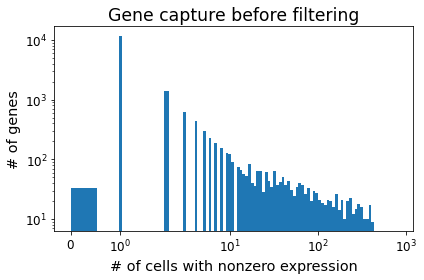

In [ ]:
import scprep
scprep.plot.histogram(scprep.measure.gene_capture_count(matrix), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [ ]:
# choose a cutoff
cutoff = 20
matrix = scprep.filter.filter_rare_genes(matrix, min_cells=cutoff)

/usr/local/lib/python3.7/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


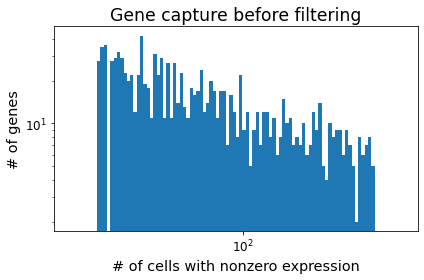

In [ ]:
import scprep
scprep.plot.histogram(scprep.measure.gene_capture_count(matrix), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

/usr/local/lib/python3.7/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


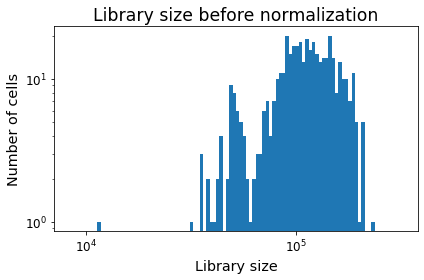

In [ ]:
scprep.plot.plot_library_size(matrix, title='Library size before normalization')

In [ ]:
matrix, library_size = scprep.normalize.library_size_normalize(matrix, return_library_size=True)

In [ ]:
matrix = scprep.transform.sqrt(matrix)

In [ ]:
matrix.shape

(430, 1208)

In [ ]:
from sklearn import decomposition
#Dimensionality reduction using PCA, denoise and better capture of the global structure 
#of the data for UMAP proyection
pca = decomposition.PCA(n_components=100,random_state=1)
pca.fit(matrix)
X = pca.transform(matrix)
print(matrix.shape)

(430, 1208)


In [ ]:
from umap.parametric_umap import ParametricUMAP
embedder = umap.UMAP(n_components=2,verbose=True,metric='cosine',n_epochs=1000,min_dist=0.1,random_state=1,n_neighbors=500,target_weight=0.5) 
data_umap_vis = embedder.fit_transform(X,sample_data_4umap)

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=1000, n_neighbors=500, random_state=1, verbose=True)
Fri Feb 18 01:10:18 2022 Construct fuzzy simplicial set


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/umap/umap_.py:2345: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Fri Feb 18 01:10:19 2022 Finding Nearest Neighbors
Fri Feb 18 01:10:26 2022 Finished Nearest Neighbor Search
Fri Feb 18 01:10:35 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Fri Feb 18 01:10:48 2022 Finished embedding


In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis, x=0, y=1, color= sample_data['status'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "Status",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
imputed_ALL =sc_PHENIX(matrix, data_umap_vis, t=5,decay=50,metric='euclidean',knn=2)

calculando distancias
(430, 430)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri Feb 18 01:31:12 2022


In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis, x=0, y=1, color= imputed_ALL['5fdbcbf910859787c61abdd2787462be'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "5fdbcbf910859787c61abdd2787462be imputed",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis, x=0, y=1, color= matrix['5fdbcbf910859787c61abdd2787462be'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "5fdbcbf910859787c61abdd2787462be imputed",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}

In [ ]:
# Etiquetas para heatmaps
lol= ['blue','red','orange','green','purple','#afeeee']
lut = dict(zip(sample_data_4umap.unique(), lol))
row_colors = sample_data_4umap.map(lut)


In [ ]:
row_colors.count()


430

In [ ]:
matrix

,5fdbcbf910859787c61abdd2787462be,7a8d774ebc149e3a4db3f186814a9964,7744ee0171a4b767f8815c6455103d7e,4c13e11c59ed3c940d380a0f33188cc9,d10716680579ff0bcf3e5dc53a1cb619,8994967a8e7c878ad16a3bb998fa8ce5,9eae628af1e873c246e6ff022ef46147,3fb440e89f5d5739309fb74e9a96ed90,dce1b129dcf21a7bf9fd4fa593d1328c,2e89171587049da1b519f44e0dce1f63,efc781dff72f4542c6b9d02fb5fd9e32,b856dc356e95110b100c5c582ac0583c,f4cf4740a5952d09fede0f858f6d712c,9a59097e786a3520a3ff40ec486216c0,913381eeccdda389c55f63eea8de1d3d,3c5ba7f9770bb027346bc9326f67e768,4fd75e97dd0b872243d205832b6de91a,64faffe285ddac3bdb26ef9063a78583,17b56754fb20875bf500274e6a3c9bdb,73aa700c30a0ff529c8c983c7e56efa3,f4bae4f1e38ddf8797fcbb9e3257743d,fd586b1fcabdb7eed1b33d33315fa389,6f6168b90fa3f70f9b13cc29d39f4692,2b451c9db3dbbaf2a9791655bcca78ad,dadcf0c13be55ba1317eea59493e0643,d610ec12863fbb961a4c7038b7bee4b4,365d8272de493d2fd29990c996c0b16c,03970b426b7dbc409579b1fec67a78a0,710944563f38127375b4f89f3e7be8f2,b75be416eb34fea63a6e16bf9e2b824d,08fbed258c79d69fd86d3908100e89e5,01c8127815ce33e87fa8fd5afb6680c0,43735d8d54ed078c77b519b29686a8ae,0fc13c283c482aebd9aa8d7ee2bb9b54,dd969193db391b6130fdfea374e15e70,8af9a4e9f95ca04a0c182ddaa15466f8,e115626fd8c8273f48dea32d8e00b6f7,52c834d30abc11724d59246db0f2c9bf,2fdd0bf9a80383bd3d2b2b70440780b3,a9713d6580eb5f501563125e7ee34060,...,1b995531e57678c70c17485eb4c86cdf,6900021fa103d185a7dd97763ae6dec4,22fd6b09cab31aad9279cd1f29f70bd9,a7e027ff5c5dd86ef97b4115441890ff,c6c06ed4c46f678f93b9b89ec66eda16,0481aac825edc5c41c72df60af49fefa,3fee72cdb220e9fe4648818de2ef2fdf,4c6b52093fcaee99864bd0b101d1b3ee,8da50ce24228dff1ff6e1f30e7dd0108,e3156962c18d63aece0c0531feb065fe,69d5bd1d39059b0dae01ef34bc1a9be1,536a3fe65fe65ffb3b938cc38033fd05,c382ce2999a4af6000676f4f283cc651,0c1cb4c37cc0727c2b7bf30095ede6c4,0690ce8830b3cc273a1233ca455bcc93,090d6a67fa39081bfcf31ba3e60d13bb,7a9913c8ff24d1e91bb0675a67139d4f,b4f230c233bcb9b9cce53d68b18d382b,733d8ce0f8ae15741db56b2aa289e2a8,3b6e6b6132ae98d184e21a9267e98590,8292b8284ac20340fa352d0a1bd7c122,53e5cdfe33f1df330caa17cf84c5dac7,c2eca4a93c967e0b6d087f98d9dd6dff,b10f8e57ce0a7f54bc5f3273762e22a5,3b161a1d7762479e4d93ce563bab6105,13f5e9e3f9f158c6485ba17f6cc7b361,36964d04f4fab984e43c7cbfd2fd22cc,5be1593a63483ddeff76f46578e59b71,864699d33b347526e4a69ac101323514,fb66aa1e484a8ac94820f01f95766117,9d9d020a0f50082fa05c9d50d638e5f8,1ab9dc11f5c76758d84a85181917a4b3,1a601865616f2308f634a949f4b2259c,0f90ad10f30c47e2a229cdb4931ad27e,cc062001b67e394aa3f593e76eeebaa7,569bd3b2be22f2fcf8e5619f7dd6a65a,ba25f4b9665973ee887f4b3fefae918b,07afb31e32dea0417446d94305f87cce,fcc57bff12bc34c9765142e6c867d291,797165bea29f144cddef94f2d0699e05
sample_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sample_30099,26.817491,15.057602,31.271190,21.217117,1.860524,0.000000,4.059995,2.969631,1.546000,2.090010,1.035100,8.205812,36.604184,0.000000,0.861255,1.035100,2.567766,11.533531,10.450052,4.019190,1.406424,6.483293,0.000000,0.000000,8.750208,12.909253,8.578992,1.491738,18.928027,21.389279,2.567766,10.234893,14.964264,8.053745,2.941746,9.586233,7.697948,4.863529,9.395184,0.000000,...,0.0,0.0000,0.907843,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
sample_30104,6.175341,16.315517,4.375179,10.297077,0.000000,0.000000,7.025024,2.352295,11.818552,5.482629,0.000000,18.485616,15.288692,1.282588,0.000000,0.000000,6.151076,3.689024,5.915599,0.000000,3.188932,9.273096,2.970413,0.000000,8.569028,0.000000,7.203699,20.746089,0.000000,7.528534,5.509838,3.709238,14.937408,22.888161,4.443015,6.211560,24.273866,4.147055,0.000000,0.000000,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.77343,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.339619,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.640692,0.000000,0.0,0.0,0.000000,0.0,0.0000

In [ ]:
matrix.shape

(430, 1208)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



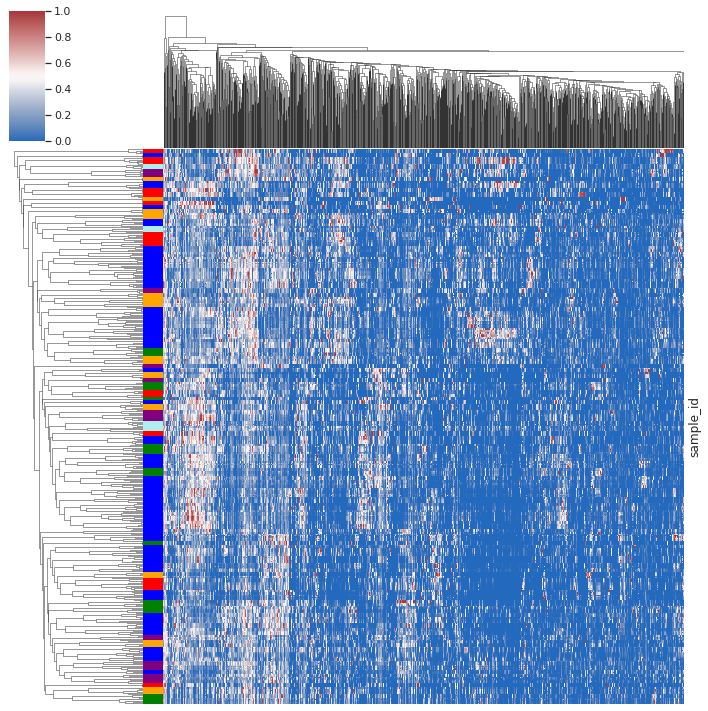

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

import seaborn as sns; sns.set_theme()
ax = sns.clustermap(imputed_ALL,row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,standard_scale=1,cmap="vlag",dendrogram_ratio=0.2)


In [ ]:
imputed_ALL.to_csv('asv_impu knn 2.csv')

In [ ]:
pd.DataFrame(data_umap_vis).to_csv('UMAP COORDINATES.csv')

In [ ]:

pd.DataFrame(sample_data_4umap).to_csv('labels.csv')
